In [1]:
import tensorflow as tf # pip install tensorflow-gpu
import cv2 # pip install opencv-python
import os # pip install opencv-contrib-python  
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # pip install numpy

In [2]:
new_model = tf.keras.models.load_model('version4.h5')

In [6]:
# Define the path to the Haar cascade file
path = "haarcascade_frontalface_default.xml"

# Set font properties
font = cv2.FONT_HERSHEY_COMPLEX

# Set font color
angry_color = (255, 0, 0)      # Red
disgust_color = (0, 255, 0)     # Green
fear_color = (0, 0, 255)        # Blue
happy_color = (255, 255, 0)     # Yellow
sad_color = (255, 0, 255)       # Magenta
surprise_color = (0, 255, 255)  # Cyan
neutral_color = (128, 128, 128) # Gray

# Initialize the video capture
cap = cv2.VideoCapture()

# Check if the camera is opened successfully
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    exit()

# Initialize variables to count emotions
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
emotion_counts = {label: 0 for label in emotion_labels}

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to retrieve frame from webcam")
        break
    
    # Load the face cascade classifier
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + path)
    # Convert the frame to grayscale
    gray_scale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detect faces in the grayscale frame
    faces = faceCascade.detectMultiScale(gray_scale, scaleFactor=1.1, minNeighbors=4)
    
    # Process each detected face
    for x, y, w, h in faces:
        roi_gray = gray_scale[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]
                
    # Preprocess the face image for prediction
    # final_image = cv2.resize(face_roi, (224,224))
    # final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)   # Add an extra dimension for channels
    # final_image = np.expand_dims(final_image, axis=0)    # Add batch dimension
    
    # Preprocess the face image for prediction
    final_image = cv2.resize(face_roi, (48, 48))
    final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
    final_image = np.expand_dims(final_image, axis=-1)
    final_image = np.expand_dims(final_image, axis=0)
    
    # Make predictions using the model
    Predictions = new_model.predict(final_image)

    if (np.argmax(Predictions) == 0):
        status = "Angry"
        color = angry_color

    elif (np.argmax(Predictions) == 1):
        status = "Disgust"
        color = disgust_color

    elif (np.argmax(Predictions) == 2):
        status = "Fear"
        color = fear_color

    elif (np.argmax(Predictions) == 3):
        status = "Happy"
        color = happy_color

    elif (np.argmax(Predictions) == 4):
        status = "Sad"
        color = sad_color

    elif (np.argmax(Predictions) == 5):
        status = "Surprise"
        color = surprise_color

    else:
        status = "Neutral"
        color = neutral_color
        
    emotion_counts[status] += 1

    x1, y1, w1, h1 = 0, 0, 120, 50
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), font, 0.7, (255, 255, 255), 2)
    cv2.putText(frame, status, (100, 150), font, 2, color, 2, cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0))

    cv2.imshow("Face Emotion Recognition", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Print the counts of emotions
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

1/1 [==============================] - 0s 154ms/step
Face not detected
1/1 [==============================] - 0s 27ms/step
Face not detected
1/1 [==============================] - 0s 24ms/step
Face not detected
1/1 [==============================] - 0s 23ms/step
Face not detected
1/1 [==============================] - 0s 23ms/step
Face not detected
1/1 [==============================] - 0s 22ms/step
Face not detected
1/1 [==============================] - 0s 22ms/step
Face not detected
1/1 [==============================] - 0s 21ms/step
Face not detected
1/1 [==============================] - 0s 22ms/step
Face not detected
1/1 [==============================] - 0s 21ms/step
Face not detected
1/1 [==============================] - 0s 22ms/step
Face not detected
1/1 [==============================] - 0s 23ms/step
Face not detected
1/1 [==============================] - 0s 22ms/step
Face not detected
1/1 [==============================] - 0s 21ms/step
Face not detected
1/1 [==============

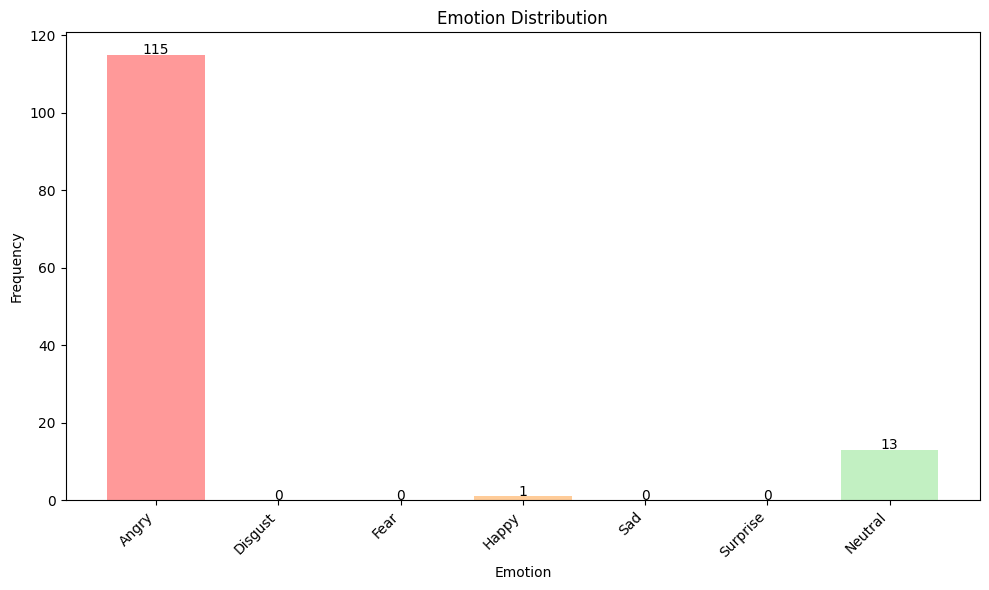

In [7]:
# Extract counts from the emotion_counts dictionary in the same order as emotion_labels
counts = [emotion_counts[label] for label in emotion_labels]

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

plt.figure(figsize=(10, 6))

plt.bar(emotion_labels, counts, color=colors)
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Distribution')

# Show counts on top of bars
for i in range(len(emotion_labels)):
    plt.text(i, counts[i] + 0.1, str(counts[i]), ha='center')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()